# Task2

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('.csv /movies.csv')

In [5]:
df.isnull().sum()

id                         0
title                      0
genres                    48
overview                   0
rating                     0
spoken_languages         202
cast                     133
crew                      26
vote_average               0
vote_count                 0
popularity                 0
budget                     0
keywords                1168
production_companies    1063
revenue                    0
runtime                    0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
m = df['vote_count'].quantile(0.80)
C = df['vote_average'].mean()
df = df[df['vote_count'] >= m]

In [8]:
# Formula
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/v+m)*R) + ((m/v+m)*C)

In [9]:
# weighted rating (score) which is used for recommending movies
df['score'] = df.apply(weighted_rating,axis=1)
df.drop(labels=['rating'],axis=1,inplace=True)

In [10]:
df.duplicated().sum()

4465

In [11]:
new_df = df.drop_duplicates()
new_df = new_df.sort_values('score', ascending=False)

new_df[["title", "vote_count", "vote_average", "score",'popularity']].head(10) #dropping unnecessary columns

,title,vote_count,vote_average,score,popularity
3323,The Godfather,6024.0,8.5,17979.902429,41.109264
1439,The Shawshank Redemption,8358.0,8.5,17979.539474,51.645403
4694,Psycho,2405.0,8.3,17743.058246,36.826309
4517,One Flew Over the Cuckoo's Nest,3001.0,8.3,17742.411692,35.529554
4712,The Godfather: Part II,3418.0,8.3,17742.093391,36.629307
8649,Life Is Beautiful,3643.0,8.3,17741.951913,39.394970
17129,Spirited Away,3968.0,8.3,17741.775880,41.048867
27782,Whiplash,4376.0,8.3,17741.591909,64.299990
2352,Schindler's List,4436.0,8.3,17741.567708,41.725123
1350,Pulp Fiction,8670.0,8.3,17740.705763,140.950236


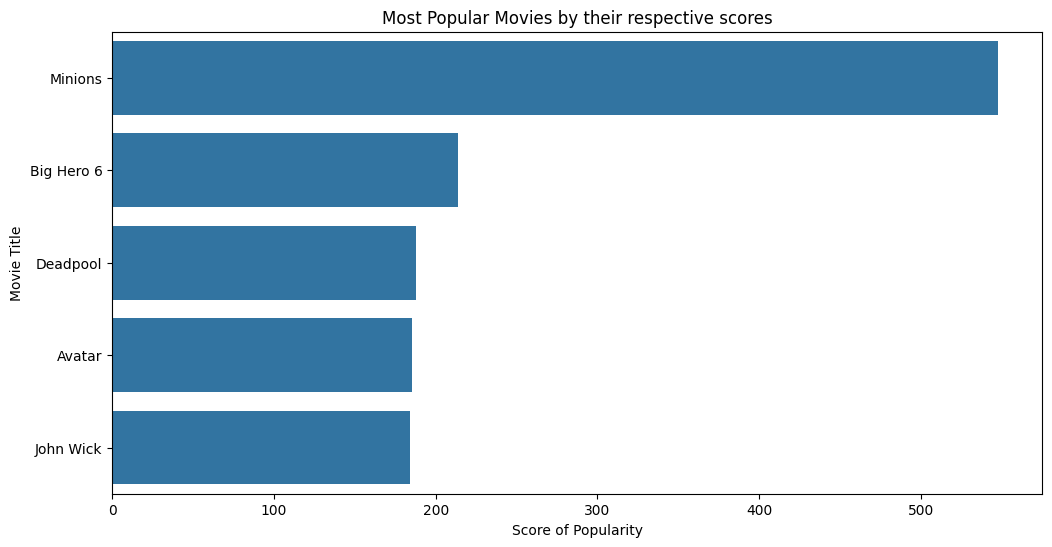

In [13]:
popularity = new_df.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))

ax = sns.barplot(x=popularity['popularity'].head(5), y=popularity['title'].head(5), data=popularity)

plt.title('Most Popular Movies by their respective scores')
plt.xlabel('Score of Popularity')
plt.ylabel('Movie Title')

plt.show()

Text(0, 0.5, 'Movie Title')

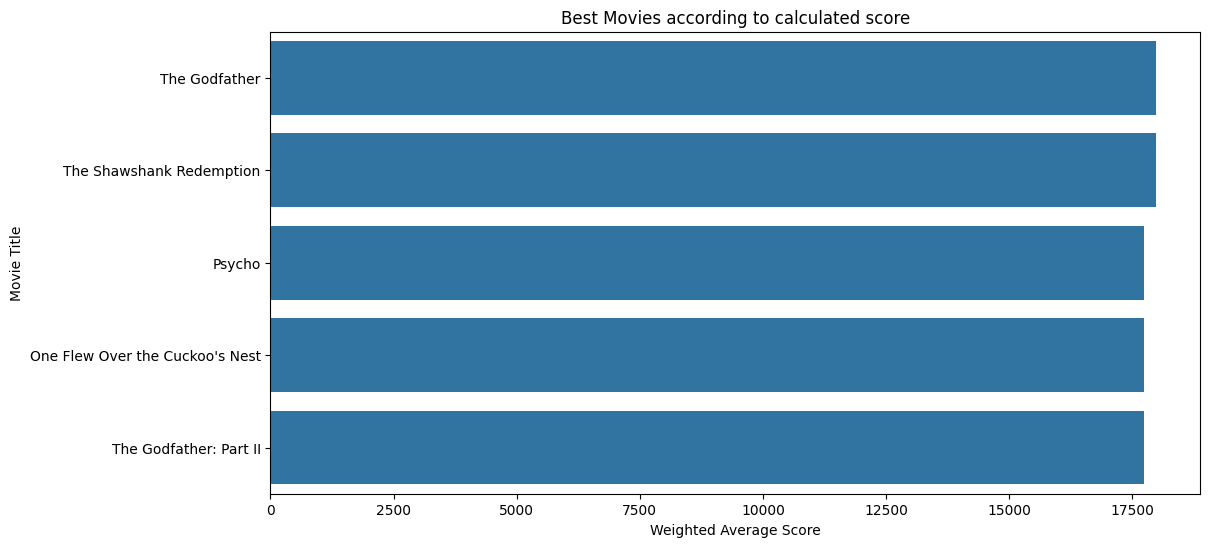

In [16]:
weight_average = new_df.sort_values('score',ascending=False)

plt.figure(figsize=(12,6))

axis1=sns.barplot(x=weight_average['score'].head(5), y=weight_average['title'].head(5), data=weight_average)

plt.title('Best Movies according to calculated score')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')